# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# From a data perspective, the goal is to build a predictive model that estimates a used car’s price based on its attributes,
# such as age, mileage, make, model, condition, fuel type, and other features. 
# This involves framing the problem as a supervised regression task, where the target variable is the car’s price 
# and the input features are the various vehicle characteristics. 
# The objective is to analyze which features contribute most to price variation and use that insight to guide pricing and inventory decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [51]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Basic overview
print("Shape of dataset:", df.shape)
print("\nFirst few rows:")
print(df.head())

Shape of dataset: (426880, 18)

First few rows:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN       

In [52]:
# Data types and missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         42

In [53]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [54]:
# Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64


In [31]:
# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [32]:
# Explore unique values for categorical columns
categorical_cols = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'title_status']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))


Value counts for manufacturer:
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
NaN                17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferra

3736928711
0
lower_limit 500.0
upper_limit 66995.0


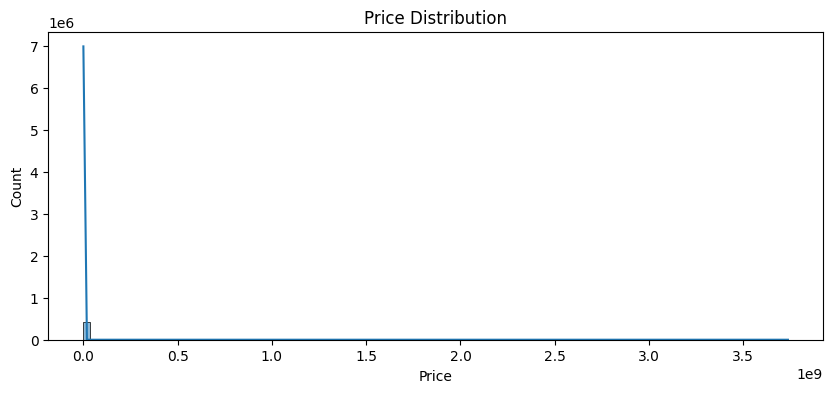

In [57]:
print(max(df['price']))
print(min(df['price']))

# Using Percentile-Based Filtering
lower_limit = df['price'].quantile(0.1)
upper_limit = df['price'].quantile(0.99)
print("lower_limit", lower_limit)
print("upper_limit", upper_limit)

# Distribution of price
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution')
# Cap to remove extreme outliers for visibility
#plt.xlim(lower_limit, upper_limit)  
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

/Users/E517276/.local/pipx/venvs/notebook/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


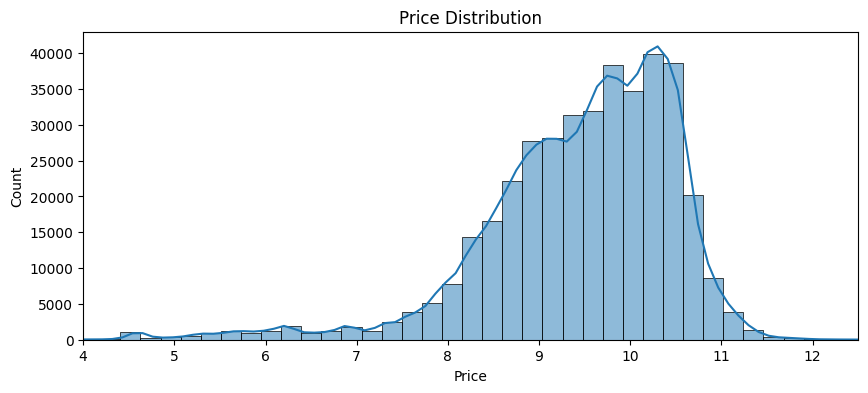

In [59]:
# Log transformation compresses high values and spreads out lower ones, making the distribution more balanced.

df['log_price'] = np.log(df['price'])
# Distribution of price
plt.figure(figsize=(10, 4))
sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(4, 12.5)  # Cap to remove extreme outliers for visibility
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

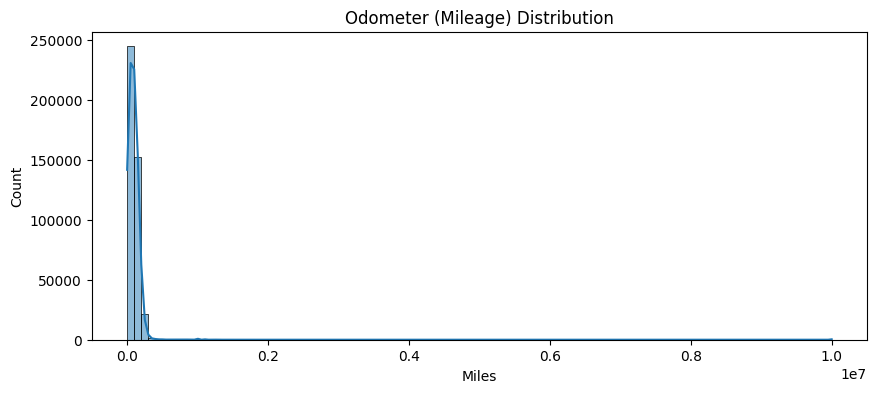

In [35]:
# Distribution of odometer (mileage)
plt.figure(figsize=(10, 4))
sns.histplot(df['odometer'], bins=100, kde=True)
plt.title('Odometer (Mileage) Distribution')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

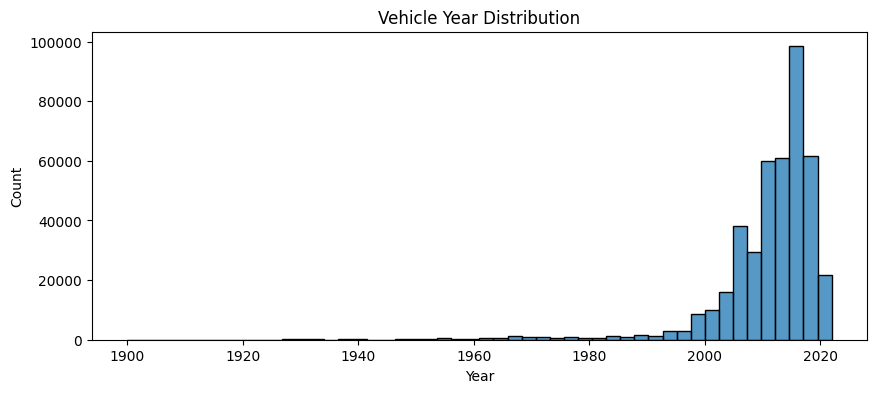

In [36]:
# Distribution of vehicle year
plt.figure(figsize=(10, 4))
sns.histplot(df['year'], bins=50, kde=False)
plt.title('Vehicle Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

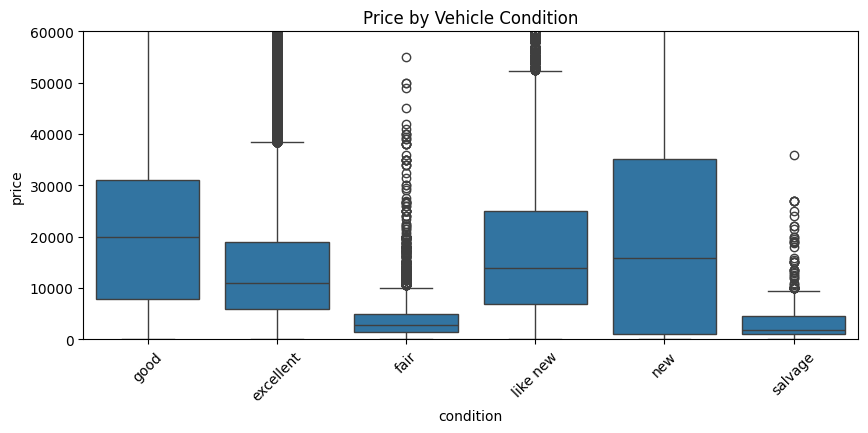

In [37]:
# Boxplot: Price by condition
plt.figure(figsize=(10, 4))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price by Vehicle Condition')
plt.xticks(rotation=45)
plt.ylim(0, 60000)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [38]:
# Data Cleanup

# Drop rows with invalid or extreme values
df_clean = df.copy()
print("Original Data Size:", len(df_clean))

# Drop entries with price <= 0 or extremely high outliers
df_clean = df_clean[(df_clean['price'] > 1000) & (df_clean['price'] < 100000)]
print("Final Size after removing price > 1000 &  price < 100000 :", len(df_clean))

# Drop entries with year or odometer missing or invalid
df_clean = df_clean[(df_clean['year'] > 1980) & (df_clean['year'] <= 2023)]
df_clean = df_clean[df_clean['odometer'].notnull()]

# Drop rows with missing values in critical features
df_clean = df_clean.dropna(subset=['manufacturer', 'condition', 'fuel', 'transmission', 'type'])

print("Final Size:", len(df_clean))

Original Data Size: 426880
Final Size after removing price > 1000 &  price < 100000 : 378659
Final Size: 193637


In [39]:
# Feature Engineering

# Create 'vehicle_age' feature
df_clean['vehicle_age'] = 2023 - df_clean['year']

In [49]:
# Define features and target

features = ['vehicle_age', 'odometer', 'manufacturer', 'condition', 'fuel', 'transmission', 'type']
target = 'log_price'

X_features_df = df_clean[features]
y_target_df = df_clean[target]

27        10.421984
28        10.025263
29        10.586332
30        10.341420
31         9.615805
            ...    
426875    10.068578
426876    10.328428
426877    10.462818
426878    10.274706
426879    10.328428
Name: log_price, Length: 193637, dtype: float64


In [43]:
# Preprocessing pipeline


numeric_features = ['vehicle_age', 'odometer']
categorical_features = ['manufacturer', 'condition', 'fuel', 'transmission', 'type']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [44]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X_features_df, y, test_size=0.2, random_state=42)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [26]:
# 1. Linear Regression (baseline)

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R²: 0.7164549206688642
RMSE: 0.43538102860334804


In [27]:
# 2. Ridge and Lasso Regression (with Grid Search)

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_params = {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2')
ridge_search.fit(X_train, y_train)

print("Best Ridge R²:", ridge_search.best_score_)
print("Best alpha:", ridge_search.best_params_['regressor__alpha'])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=5000))
])

lasso_params = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='r2')
lasso_search.fit(X_train, y_train)

print("Best Lasso R²:", lasso_search.best_score_)
print("Best alpha:", lasso_search.best_params_['regressor__alpha'])

Best Ridge R²: 0.7133170880082758
Best alpha: 0.1
Best Lasso R²: 0.6320362239731532
Best alpha: 0.01


In [29]:
# 3. Random Forest Regressor

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Mean CV R²:", rf_scores.mean())

Random Forest Mean CV R²: 0.8748730668918892


In [30]:
# 4. Gradient Boosting Regressor

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

gb_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2')
print("Gradient Boosting Mean CV R²:", gb_scores.mean())

Gradient Boosting Mean CV R²: 0.7961622880287


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [32]:
# Final Model Evaluation: Gradient Boosting Example

from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Fit model on full training set
gb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = gb_pipeline.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Gradient Boosting - Test R²:", r2)
print("Gradient Boosting - Test RMSE:", rmse)

Gradient Boosting - Test R²: 0.7948043717030779
Gradient Boosting - Test RMSE: 0.3703757087495412


                     feature  importance
0           num__vehicle_age    0.568069
1              num__odometer    0.198958
66           cat__type_sedan    0.045174
67           cat__type_truck    0.034197
49          cat__fuel_diesel    0.029953
65          cat__type_pickup    0.021343
56   cat__transmission_other    0.018413
44       cat__condition_fair    0.015034
61       cat__type_hatchback    0.014579
43  cat__condition_excellent    0.005456


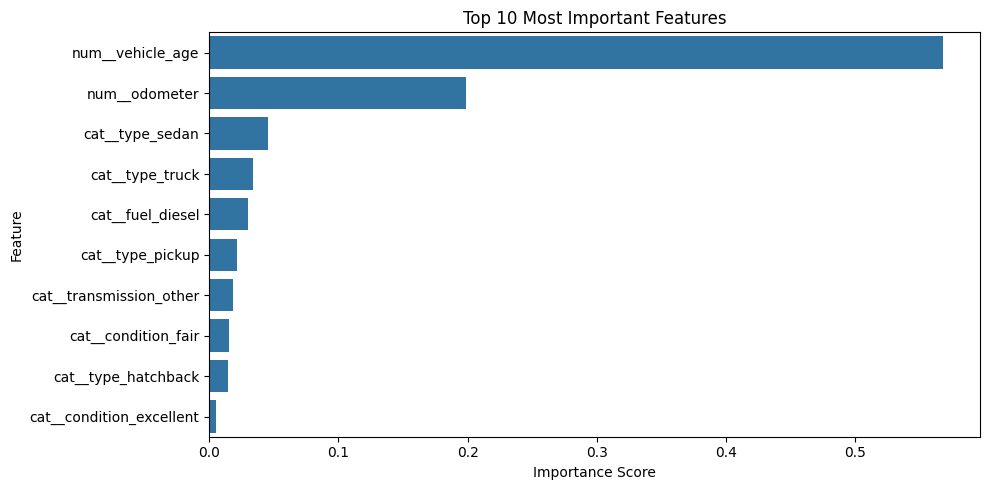

In [33]:
# Feature Importance (for Tree-Based Models)

# Get feature names after preprocessing
preprocessed_feature_names = gb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract feature importances
importances = gb_pipeline.named_steps['regressor'].feature_importances_

# Combine into sorted list
feature_importance = pd.DataFrame({
    'feature': preprocessed_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Show top 10
print(feature_importance.head(10))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [34]:
# Optional: Compare Models Side-by-Side

models = {
    'Linear Regression': lr_model,
    'Ridge': ridge_search.best_estimator_,
    'Lasso': lasso_search.best_estimator_,
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name}: R² = {r2:.3f}, RMSE = {rmse:.2f}")


Linear Regression: R² = 0.716, RMSE = 0.44
Ridge: R² = 0.716, RMSE = 0.44
Lasso: R² = 0.638, RMSE = 0.49
Random Forest: R² = 0.879, RMSE = 0.28
Gradient Boosting: R² = 0.795, RMSE = 0.37


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.